# 이재명 EDA

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import EarlyStoppingCallback
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords

In [2]:
tweet_df = pd.read_csv( '/Users/sonak_bee/Desktop/이재명/이재명result1.csv')
tweet_df.describe

<bound method NDFrame.describe of        Unnamed: 0.2  Unnamed: 0.1 Unnamed: 0                   Datetime  \
0                 0             0          0  2022-02-08 23:59:52+00:00   
1                 1             1          1  2022-02-08 23:59:45+00:00   
2                 2             2          2  2022-02-08 23:59:44+00:00   
3                 3             3          3  2022-02-08 23:59:33+00:00   
4                 4             4          4  2022-02-08 23:58:42+00:00   
...             ...           ...        ...                        ...   
29044          8011           998        996  2022-03-08 21:14:31+00:00   
29045          8012           999        997  2022-03-08 21:14:25+00:00   
29046          8013          1000        998  2022-03-08 21:14:24+00:00   
29047          8014          1001        999  2022-03-08 21:14:00+00:00   
29048          8015          1002       1000  2022-03-08 21:13:47+00:00   

           Tweet Id                                              

In [3]:
tweet_df = tweet_df.dropna(axis=0)

In [4]:
tweet_df[:-30]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,0,0,2022-02-08 23:59:52+00:00,1.491200e+18,진짜 다급하긴 한가 보다.\n\n이재명 “취임 시 지난 2년간 발생한 자영업자 손실...,atree4you
1,1,1,1,2022-02-08 23:59:45+00:00,1.491200e+18,"윤석열 ""단일화, 서로 신뢰한다면 \n10분 안에도 끝낼 수 있다""\n\n…❅❅✤❀...",eunsang_i
2,2,2,2,2022-02-08 23:59:44+00:00,1.491200e+18,"이재명 만나 ‘유능’ 강조한 윤여준 “경제 모르는 대통령, 국민에게 공포”@news...",newsvop
3,3,3,3,2022-02-08 23:59:33+00:00,1.491200e+18,@lawyerhyun7 부끄러어라 ㅋㅋ이낙연이면 벌써이기고도남았늘것 ㅋㅋ이럴줄몰랐니...,solo53732152
4,4,4,4,2022-02-08 23:58:42+00:00,1.491200e+18,"이재명 ""中 불법 어선 격침해버려야..할 말은 한다"" | 다음 뉴스 https://...",jyojyo74535529
...,...,...,...,...,...,...,...
29011,7978,965,965,2022-03-08 21:22:28+00:00,1.501307e+18,독일입니다. 이재명 대통령이라 불러보길 소망합니다. 조금만 더 역사의 수레바퀴...,JeongKyowon
29012,7979,966,966,2022-03-08 21:22:13+00:00,1.501307e+18,"청계광장 구름 인파..이재명 ""어게인 2002, 승리 역사 만들어달라""\n\n촛불집...",VanFaren
29013,7980,967,967,2022-03-08 21:22:00+00:00,1.501307e+18,부디 오늘로서 소시오패스 범죄자 이재명의 몰락이 시작되길. 그렇게 법의 심판을 받기...,CrazyonU6369
29014,7981,968,968,2022-03-08 21:21:56+00:00,1.501307e+18,@Jaemyung_Lee ✌✌,Lucky200210


In [5]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",str(text))
  text = re.sub("@[\w]*","",str(text))
  text = re.sub("https?://[A-Za-z0-9./]*","",str(text))
  text = re.sub("\n","",str(text))
  return str(text)

In [6]:
tweet_df['Text'] = tweet_df['Text'].apply(lambda x: clean_tweets(x))
data = tweet_df
data[:30]

/var/folders/2w/2z4q8csj44n7n7864g6q6b2r0000gn/T/ipykernel_1453/808506668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['Text'] = tweet_df['Text'].apply(lambda x: clean_tweets(x))


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,0,0,2022-02-08 23:59:52+00:00,1.491200e+18,진짜 다급하긴 한가 보다.이재명 “취임 시 지난 2년간 발생한 자영업자 손실 모두 ...,atree4you
1,1,1,1,2022-02-08 23:59:45+00:00,1.491200e+18,"윤석열 ""단일화, 서로 신뢰한다면 10분 안에도 끝낼 수 있다""…❅❅✤❀ 毒舌문재인...",eunsang_i
2,2,2,2,2022-02-08 23:59:44+00:00,1.491200e+18,"이재명 만나 ‘유능’ 강조한 윤여준 “경제 모르는 대통령, 국민에게 공포”",newsvop
3,3,3,3,2022-02-08 23:59:33+00:00,1.491200e+18,부끄러어라 ㅋㅋ이낙연이면 벌써이기고도남았늘것 ㅋㅋ이럴줄몰랐니?목에 칼이들어와도 이...,solo53732152
4,4,4,4,2022-02-08 23:58:42+00:00,1.491200e+18,"이재명 ""中 불법 어선 격침해버려야..할 말은 한다"" | 다음 뉴스",jyojyo74535529
5,5,5,5,2022-02-08 23:58:41+00:00,1.491200e+18,절라 국제신사 이낙연을 팽하고 안동 양아치 이재명의 감언이설에 쏙아 졸라인으로 착...,elephant989
6,6,6,6,2022-02-08 23:58:15+00:00,1.491200e+18,어제 상의해본다는 트윗본것 같은데 결과가 어떻게 됐다는 트윗은 없나봐요 아무튼 각...,miokida
7,7,7,7,2022-02-08 23:58:11+00:00,1.491200e+18,싸구려 인간 윤여준윤성열이 대통령 하겠다고 하자 윤씨 족보 운운하며 칭찮하던 사람이...,yunhaja
8,8,8,8,2022-02-08 23:58:05+00:00,1.491200e+18,맞고요.. 3차 접종자는 자유롭게 !!,moXsiyLrdLIpovm
9,9,9,9,2022-02-08 23:58:00+00:00,1.491200e+18,"대한민국대표 책사들이 말하는 대선후보이재명 ""해본 사람에게 일 맡겨야"" 시작이 반'...",chunggeolkim


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [8]:
text = str(data['Text'].values)

In [9]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

ignore = ['마네','이재명','김홍걸','정치','출처','대통령','진짜'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

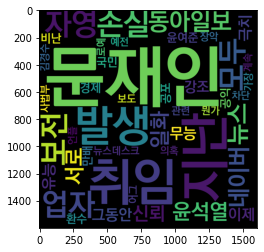

In [10]:
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

/var/folders/2w/2z4q8csj44n7n7864g6q6b2r0000gn/T/ipykernel_1453/2575641325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hash']=data['Text'].apply(lambda x:find_hash(x))


<AxesSubplot:xlabel='Hashtag', ylabel='count'>

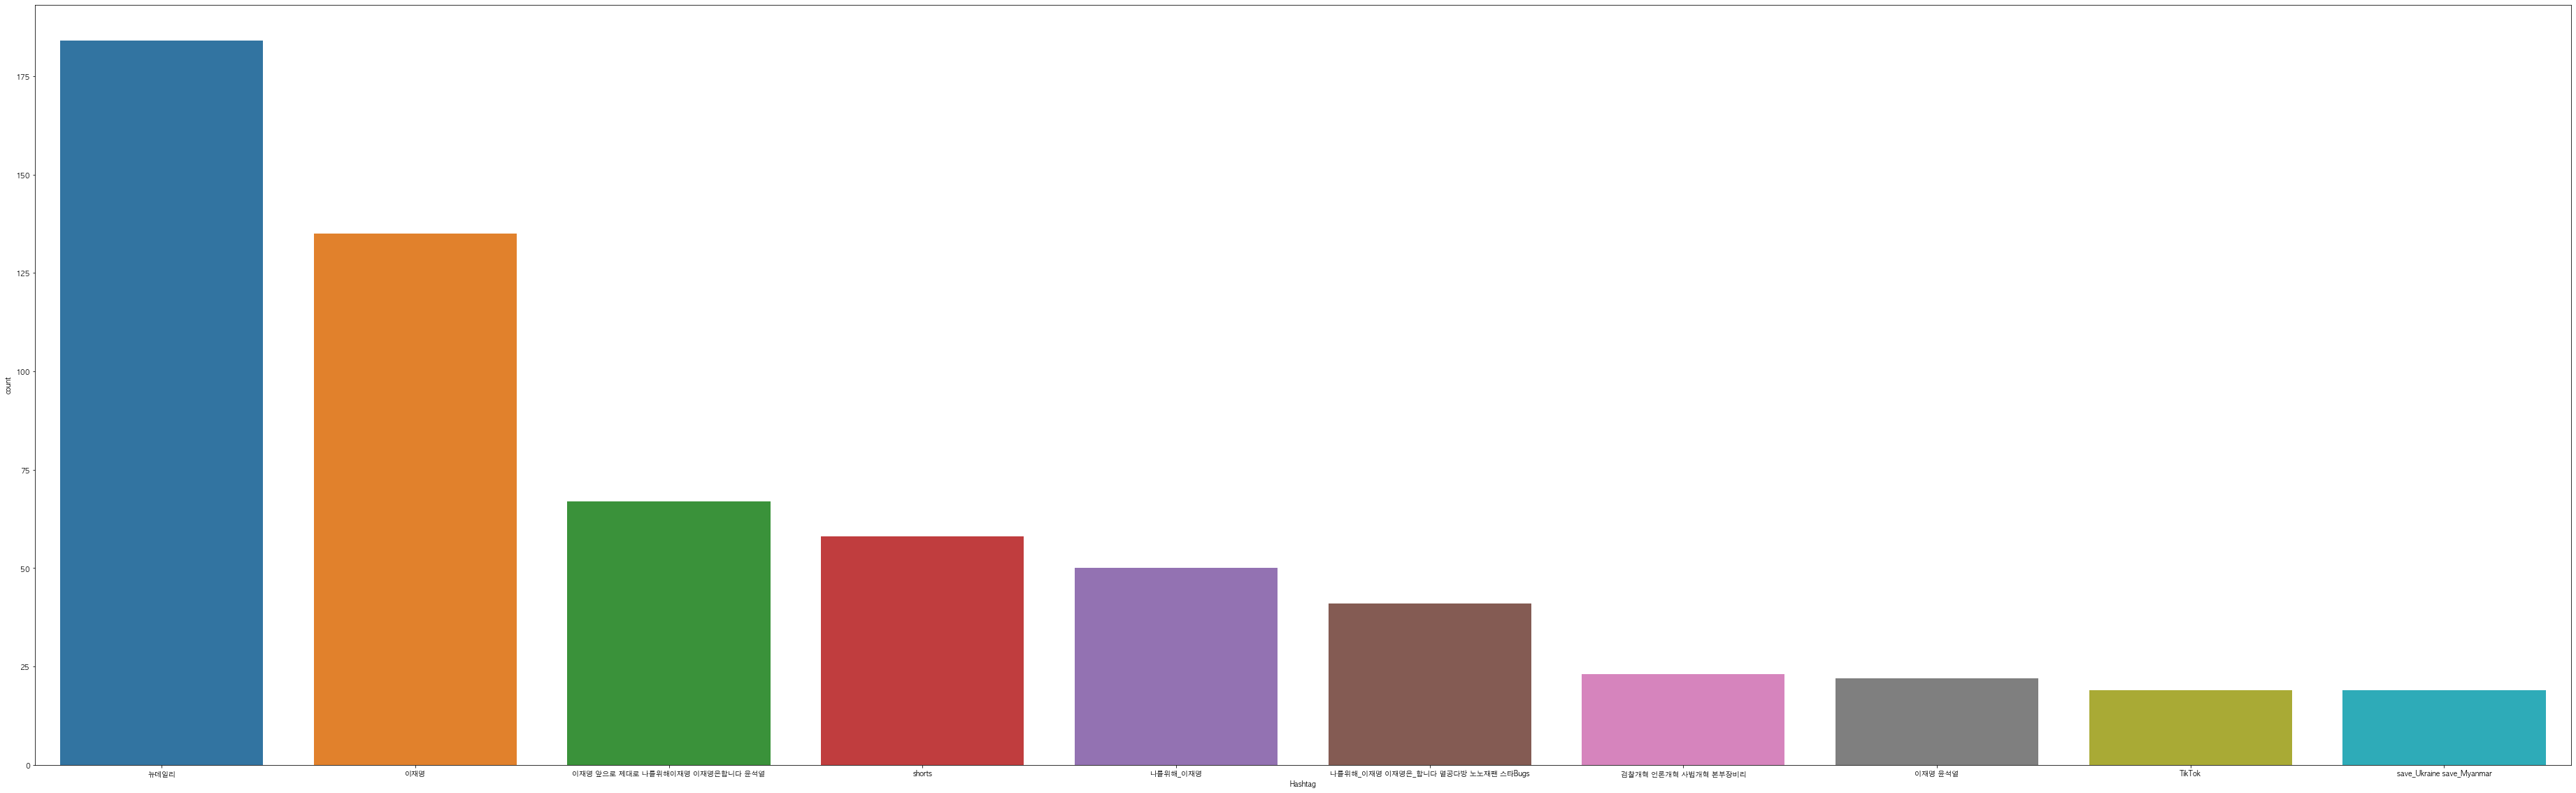

In [12]:
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
data['hash']=data['Text'].apply(lambda x:find_hash(x))
temp=data['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
plt.figure(figsize = (65,20))
sns.barplot(x="Hashtag",y="count", data = temp)

In [13]:
df3 = pd.read_csv('/Users/sonak_bee/Desktop/이재명/이재명result1.csv', encoding='utf-8')

In [14]:
df3 = df3.dropna(axis=0)

In [15]:
import os
import re
import platform

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from datetime import datetime
from tqdm import tqdm
from collections import Counter
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 그래프 파일 저장
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 한글 폰트 설정
def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [16]:
df3 = df3[~df3['Datetime'].str.contains("joongangilbo", na=False, case=False)]

In [17]:
df3['date'] = pd.to_datetime(df3['Datetime']).apply(lambda x: x.date())
df3['date_re'] = df3['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

In [18]:
df3 = df3.sort_values(by="date")

In [19]:
df3

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,date,date_re
0,0,0,0,2022-02-08 23:59:52+00:00,1.491200e+18,진짜 다급하긴 한가 보다.\n\n이재명 “취임 시 지난 2년간 발생한 자영업자 손실...,atree4you,2022-02-08,2022-02-08
660,660,660,659,2022-02-08 20:30:18+00:00,1.491147e+18,[국민뉴스] 뉴욕서 보수성향단체들 윤석열 옹호 지지 불법광고 난장판...뉴욕한국일보...,kookminnews,2022-02-08,2022-02-08
661,661,661,660,2022-02-08 20:29:37+00:00,1.491147e+18,내가 공직 오래 해봐서 아는데 상관 마누라가 한급 더 높음 성남 시장시 부인은 이미...,td65031,2022-02-08,2022-02-08
662,662,662,661,2022-02-08 20:27:18+00:00,1.491147e+18,뉴스공장 쎈언니 증언! 울산택시1300명 이재명 지지선언! https://t.co/...,jayko2020,2022-02-08,2022-02-08
663,663,663,662,2022-02-08 20:25:20+00:00,1.491146e+18,@napalmogi @cwZICRFIxl77WNW 그렇죠. 돈을 먹은 놈들이 범...,1lafC7e38Ucx7E8,2022-02-08,2022-02-08
...,...,...,...,...,...,...,...,...,...
28384,7351,338,338,2022-03-08 23:20:32+00:00,1.501337e+18,"@JewelofGod5 저거 원래 송영길이 이재명쪽에 있었는데, 이낙연후보랑 손잡으...",28denture,2022-03-08,2022-03-08
28385,7352,339,339,2022-03-08 23:20:32+00:00,1.501337e+18,진실은 어짜피 알 수 없지만 한 가지 확실한 것은 이재명의 잠재적 정치 경쟁자는 이...,gNuNPtpvfdy5w2l,2022-03-08,2022-03-08
28386,7353,340,340,2022-03-08 23:20:26+00:00,1.501337e+18,대못죽에 걸린 이재명 투표하러 가야하는데..,skgus9090,2022-03-08,2022-03-08
28373,7340,327,327,2022-03-08 23:21:26+00:00,1.501337e+18,윤석열이 보복수사하겠다고 했다는 것은 허위사실로 고소 당해도 충분한 언급이네요. 오...,stillwalking3,2022-03-08,2022-03-08


In [20]:
df3['tokenizing'] = df3['Text'].apply(lambda x:str(x).split())

In [21]:
df3

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,date,date_re,tokenizing
0,0,0,0,2022-02-08 23:59:52+00:00,1.491200e+18,진짜 다급하긴 한가 보다.\n\n이재명 “취임 시 지난 2년간 발생한 자영업자 손실...,atree4you,2022-02-08,2022-02-08,"[진짜, 다급하긴, 한가, 보다., 이재명, “취임, 시, 지난, 2년간, 발생한,..."
660,660,660,659,2022-02-08 20:30:18+00:00,1.491147e+18,[국민뉴스] 뉴욕서 보수성향단체들 윤석열 옹호 지지 불법광고 난장판...뉴욕한국일보...,kookminnews,2022-02-08,2022-02-08,"[[국민뉴스], 뉴욕서, 보수성향단체들, 윤석열, 옹호, 지지, 불법광고, 난장판...."
661,661,661,660,2022-02-08 20:29:37+00:00,1.491147e+18,내가 공직 오래 해봐서 아는데 상관 마누라가 한급 더 높음 성남 시장시 부인은 이미...,td65031,2022-02-08,2022-02-08,"[내가, 공직, 오래, 해봐서, 아는데, 상관, 마누라가, 한급, 더, 높음, 성남..."
662,662,662,661,2022-02-08 20:27:18+00:00,1.491147e+18,뉴스공장 쎈언니 증언! 울산택시1300명 이재명 지지선언! https://t.co/...,jayko2020,2022-02-08,2022-02-08,"[뉴스공장, 쎈언니, 증언!, 울산택시1300명, 이재명, 지지선언!, https:..."
663,663,663,662,2022-02-08 20:25:20+00:00,1.491146e+18,@napalmogi @cwZICRFIxl77WNW 그렇죠. 돈을 먹은 놈들이 범...,1lafC7e38Ucx7E8,2022-02-08,2022-02-08,"[@napalmogi, @cwZICRFIxl77WNW, 그렇죠., 돈을, 먹은, 놈..."
...,...,...,...,...,...,...,...,...,...,...
28384,7351,338,338,2022-03-08 23:20:32+00:00,1.501337e+18,"@JewelofGod5 저거 원래 송영길이 이재명쪽에 있었는데, 이낙연후보랑 손잡으...",28denture,2022-03-08,2022-03-08,"[@JewelofGod5, 저거, 원래, 송영길이, 이재명쪽에, 있었는데,, 이낙연..."
28385,7352,339,339,2022-03-08 23:20:32+00:00,1.501337e+18,진실은 어짜피 알 수 없지만 한 가지 확실한 것은 이재명의 잠재적 정치 경쟁자는 이...,gNuNPtpvfdy5w2l,2022-03-08,2022-03-08,"[진실은, 어짜피, 알, 수, 없지만, 한, 가지, 확실한, 것은, 이재명의, 잠재..."
28386,7353,340,340,2022-03-08 23:20:26+00:00,1.501337e+18,대못죽에 걸린 이재명 투표하러 가야하는데..,skgus9090,2022-03-08,2022-03-08,"[대못죽에, 걸린, 이재명, 투표하러, 가야하는데..]"
28373,7340,327,327,2022-03-08 23:21:26+00:00,1.501337e+18,윤석열이 보복수사하겠다고 했다는 것은 허위사실로 고소 당해도 충분한 언급이네요. 오...,stillwalking3,2022-03-08,2022-03-08,"[윤석열이, 보복수사하겠다고, 했다는, 것은, 허위사실로, 고소, 당해도, 충분한,..."


In [22]:
def remove_stopword(x):
    return [y for y in x if y not in ['이','(출처',':','-','윤석열','이재명의','이재명을','@YouTube','이재명은','@Jaemyung_Lee','이재명이','또','대선','후보','힘','국민의 힘','|','국힘','국힘당','국민의','gt','너무','그','더','다','표','안','거','수','게','ㅠㅠ','것','진짜','하는','왜','합니다','아닌','하고','이재명']]
df3['tokenizing'] = df3['tokenizing'].apply(lambda x:remove_stopword(x))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


그림 저장: most common word by date


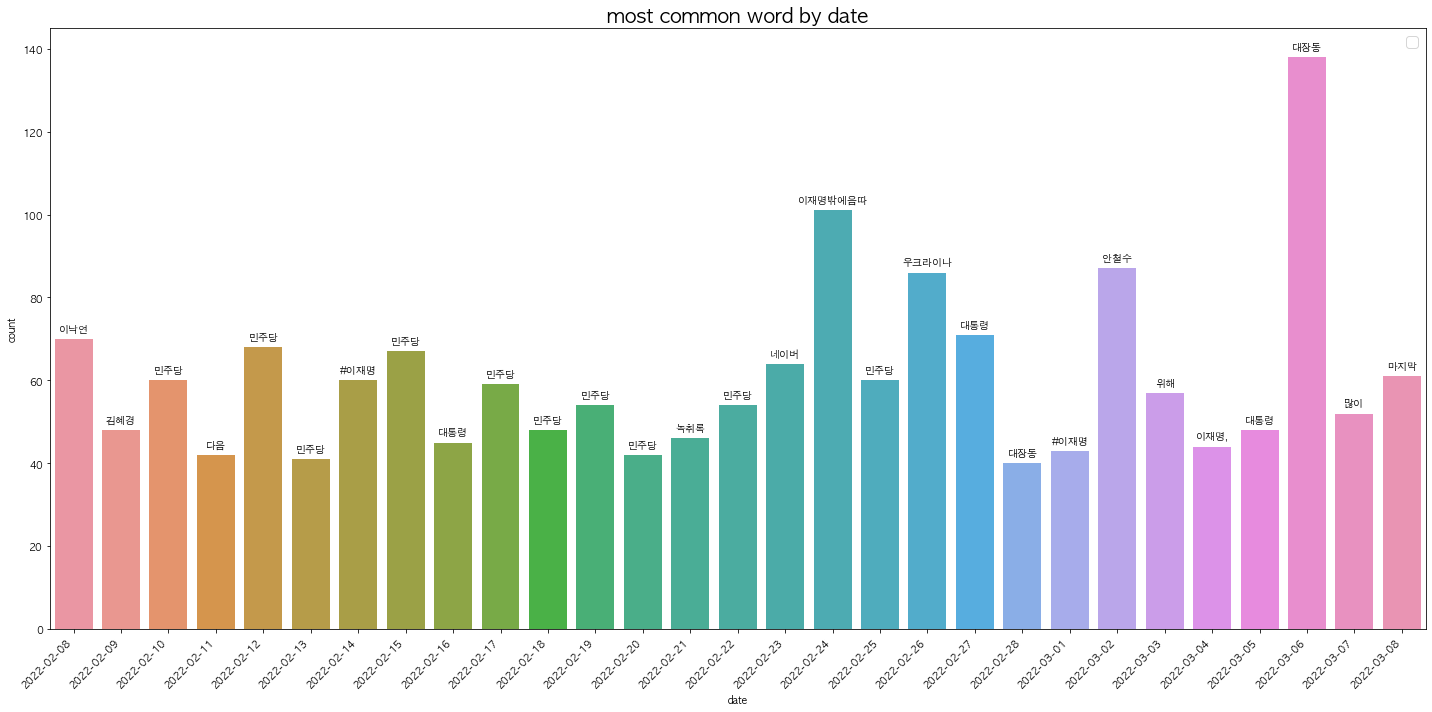

In [23]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def add_value_labels(ax, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(df3['word'][idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)

date = []
word_list = []
count_list = []

for i in df3['date_re'].unique():
    tokenizing = sum(df3[df3['date_re'] == i]['tokenizing'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
df3 = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(df3['date'], df3['count'])
add_value_labels(ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date")

In [24]:
df3 = pd.read_csv( '/Users/sonak_bee/Desktop/이재명/이재명result1.csv')
df3.describe

<bound method NDFrame.describe of        Unnamed: 0.2  Unnamed: 0.1 Unnamed: 0                   Datetime  \
0                 0             0          0  2022-02-08 23:59:52+00:00   
1                 1             1          1  2022-02-08 23:59:45+00:00   
2                 2             2          2  2022-02-08 23:59:44+00:00   
3                 3             3          3  2022-02-08 23:59:33+00:00   
4                 4             4          4  2022-02-08 23:58:42+00:00   
...             ...           ...        ...                        ...   
29044          8011           998        996  2022-03-08 21:14:31+00:00   
29045          8012           999        997  2022-03-08 21:14:25+00:00   
29046          8013          1000        998  2022-03-08 21:14:24+00:00   
29047          8014          1001        999  2022-03-08 21:14:00+00:00   
29048          8015          1002       1000  2022-03-08 21:13:47+00:00   

           Tweet Id                                              

In [25]:
import re

# Basic Cleaning Text Function
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets RT @user_screenname 
    text = re.sub('RT @[\w_]+: ', '', readData)
    text = re.sub('알티', '', text)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    
    # Remove Hashtag
    text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [26]:
df3['Text'] = df3['Text'].apply(lambda x: CleanText(str(x)))
df3 = df3.dropna(axis=0)

In [27]:
del df3["Unnamed: 0.2"]
del df3["Unnamed: 0.1"]
del df3["Unnamed: 0"]

In [28]:
lee = df3[df3['Text'].str.contains('이낙연')]
lee[:30]

,Datetime,Tweet Id,Text,Username
3,2022-02-08 23:59:33+00:00,1.491200e+18,부끄러어라 ㅋㅋ이낙연이면 벌써이기고도남았늘것 ㅋㅋ이럴줄몰랐니 목에 칼이들어와도 이재...,solo53732152
5,2022-02-08 23:58:41+00:00,1.491200e+18,절라 국제신사 이낙연을 팽하고 안동 양아치 이재명의 감언이설에 쏙아 졸라인으로 착각...,elephant989
14,2022-02-08 23:57:10+00:00,1.491199e+18,2 9 하루백번복붙 내표내맘 이낙연 지지해도 이재명 안찍는다 윤석열이 최선 윤석열 ...,TheMoonDragon
25,2022-02-08 23:53:44+00:00,1.491199e+18,이낙연이 선대위원장하면 재명이에게 손해임 이낙연이 주는 이미지는 경선회고와 아쉬움 ...,Legion42256773
26,2022-02-08 23:53:41+00:00,1.491199e+18,총괄선대위원장 앞에 이재명 패거리들 석고대죄 했니 이마 바닥에 찧었니 뭐 그래도 우...,artemizhb
29,2022-02-08 23:53:05+00:00,1.491198e+18,이낙연 대표가 총괄선대위원장이 되었으니 이재명 뽑을거란 생각은 문파오깨비들을 너무 ...,rezitativo
31,2022-02-08 23:52:54+00:00,1.491198e+18,이낙연님 때문에 지지층 결집이라면 난 지지층 아닌걸로 이재명 경북공약 어쩌구하는 문...,hjkim1609
39,2022-02-08 23:51:59+00:00,1.491198e+18,이낙연은 총괄선대위원장으로 명분을 챙기고 우린 모두 이재명 낙선 감방행을 위해 윤석...,Happy_Life_2513
50,2022-02-08 23:49:43+00:00,1.491198e+18,이낙연 대표님 죄송합니다 이재명 안찍어요 제 표는 제가 알아서 하겠습니다 범죄자를 ...,skymanhan
68,2022-02-08 23:46:45+00:00,1.491197e+18,2 9 하루백번복붙 내표내꺼 내표내맘 이낙연 지지해도 이재명 안찍는다 윤석열이 최선...,AnnaJusticePark


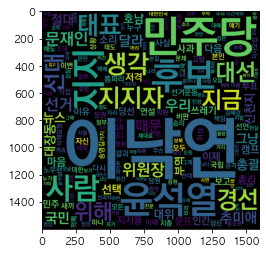

In [34]:
text = str(lee['Text'].values)
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

ignore = ['마네','이재명','김홍걸','정치','출처','대통령','진짜'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [29]:
kim = df3[df3['Text'].str.contains('김혜경')]
kim[:30]

,Datetime,Tweet Id,Text,Username
30,2022-02-08 23:53:04+00:00,1.491198e+18,아직도 기생충 이재명 김혜경이 한국을 접수하는걸 지지한다니 졸라인들 졸라 한심하다,elephant989
48,2022-02-08 23:50:11+00:00,1.491198e+18,이재명 김혜경 같은 기생충 엄는 대한민국 건설이 선거 모토가 되야한다,elephant989
55,2022-02-08 23:48:36+00:00,1.491197e+18,법카가 이재명 김혜경 기생충 먹이사슬인겨,elephant989
56,2022-02-08 23:48:35+00:00,1.491197e+18,가사도우미 몰랐다는 이재명김혜경 대놓고 사설까지 나오는 판 계속 몰랐다고 발뺌하면 ...,Knifeknife13
67,2022-02-08 23:46:56+00:00,1.491197e+18,이재명 김혜경같은 대형 기생충을 박멸하라 이재명 기생충이 국가를 접수 할려하는 순간이다,elephant989
81,2022-02-08 23:42:22+00:00,1.491196e+18,이재명 김혜경 수발이나 하는 역할 5급 사무관 이 사람 실제로 뭐하는 사람이냐,qzbB2WXomqKR71B
90,2022-02-08 23:40:54+00:00,1.491195e+18,이제 이재명 김혜경은 배소현도 모르는 사람이라고 할 건가 배씨도 진짜로 위험해 꼬리...,artemizhb
104,2022-02-08 23:39:40+00:00,1.491195e+18,국민 기생충 이재명 김혜경을 몰아내자,elephant989
116,2022-02-08 23:38:34+00:00,1.491195e+18,조중동등은 날이면날마다 김혜경 이재명 뉴스만 거니 서겨리 너무 이뻐하는게 넘 표나자...,jk2idk5qqP535he
118,2022-02-08 23:38:15+00:00,1.491195e+18,민주당목적은 이재명와 김혜경한테 왕관을 씌워주고 싶은거 같습니다 우린 됐다 이놈들아...,bestdogtory


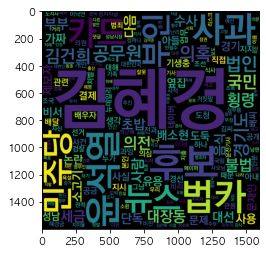

In [35]:
text = str(kim['Text'].values)
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

ignore = ['마네','이재명','김홍걸','정치','출처','대통령','진짜'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [30]:
s = df3[df3['Text'].str.contains('녹취록')]
s[:30]

,Datetime,Tweet Id,Text,Username
638,2022-02-08 20:47:00+00:00,1.491152e+18,2022 02 08 뉴데일리 220208 024 김혜경 황제의전 전형적 부패 이재명...,hja2022
647,2022-02-08 20:39:00+00:00,1.491150e+18,김만배 녹취록에서 그분 나오니까 그분은 이재명이다 주장하고 김만배가 권순일 만났다고...,tteonaelyeogan1
663,2022-02-08 20:25:20+00:00,1.491146e+18,그렇죠 돈을 먹은 놈들이 범인이죠 화천대유 사람들 녹취록에도 이재명 이름은 안 나오...,1lafC7e38Ucx7E8
824,2022-02-08 18:14:54+00:00,1.491113e+18,김만배 천배도 아니고 만배를 벌었다 만배는 내가 입열면 윤석열은 죽는다 녹음내용처럼...,sunghyun7700
968,2022-02-08 16:54:03+00:00,1.491093e+18,전옥현안보정론TV 안철수 극비 김종인 회동 김은혜 3억 이재명 선거자금설 충격 녹취...,eNZZJB1xqVWBK4Y
1214,2022-02-09 23:14:54+00:00,1.491551e+18,김혜경 황제의전 전형적 부패이자 이재명의 도정농단 이재명 집안일 심부름과 법인카드 ...,kimls01
1292,2022-02-09 22:51:03+00:00,1.491545e+18,이재명 변호사비 대납 녹취록은 조작된 가짜 쌍방울에도 화천대유 손길 삼부토건도 화천...,jimmoris22
1336,2022-02-09 22:34:38+00:00,1.491541e+18,4452 부정경선 결선불복 이재명이 절때 대통령될 수 없는 이유 형수쌍욕 녹취록 야...,chadoolj
3076,2022-02-11 23:49:39+00:00,1.492285e+18,이재명에 대한 김부선과 점병 형수와의 오고간 녹취록,therocksoo
3735,2022-02-11 18:47:54+00:00,1.492209e+18,넘 웃기다 녹취록 나오고 갑자기 추리물이 되어버렸다는 반응들 근데 박근혜 이후 진짜...,MoonWalkerinkor


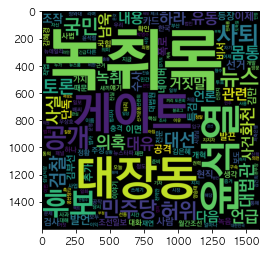

In [37]:
text = str(s['Text'].values)
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

ignore = ['마네','이재명','김홍걸','정치','출처','대통령','진짜','만배'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [31]:
n = df3[df3['Text'].str.contains('네이버')]
n[:30]

,Datetime,Tweet Id,Text,Username
0,2022-02-08 23:59:52+00:00,1.491200e+18,진짜 다급하긴 한가 보다 이재명 취임 시 지난 2년간 발생한 자영업자 손실 모두 보...,atree4you
21,2022-02-08 23:54:42+00:00,1.491199e+18,이재명 중국 불법 어선 격침 이준석 사드는 눈치 보더니 출처 MBN 네이버 뉴스,chaigom
95,2022-02-08 23:40:36+00:00,1.491195e+18,이재명 올림픽 동네잔치 변질 화합 해쳐 당국 성찰 필요 출처 데일리안 네이버 뉴스,sunn2ya
97,2022-02-08 23:40:26+00:00,1.491195e+18,이재명 윤여준과 만찬 뉴노멀시대준비위원장 제안 출처 연합뉴스TV 네이버 뉴스,sunn2ya
98,2022-02-08 23:40:17+00:00,1.491195e+18,이재명 3차 접종자는 자정까지 식당 이용하도록 제안 출처 SBS 네이버 뉴스,sunn2ya
102,2022-02-08 23:40:00+00:00,1.491195e+18,이재명 n번방 추적단 대담 디지털성범죄 근절 공약 출처 연합뉴스TV 네이버 뉴스,sunn2ya
103,2022-02-08 23:39:49+00:00,1.491195e+18,이재명 생명 안전 행보 재난 산재 희생자 추모 출처 뉴시스 네이버 뉴스,sunn2ya
130,2022-02-08 23:35:55+00:00,1.491194e+18,허위 영상에 사칭글까지 이재명 발목 잡는 내부 악재에 울상 출처 뉴스1 네이버 뉴스,A4050
134,2022-02-08 23:35:34+00:00,1.491194e+18,증상 유무 접종력 관계없다 확진자 검체 채취일부터 7일간 격리 출처 세계일보 네이버...,songga15da
164,2022-02-08 23:27:40+00:00,1.491192e+18,이재명 토론회때 분명히 친중반문 이였는데 또 말바꾼거야 반중정서 폭발 이재명 친중 ...,yoyoily


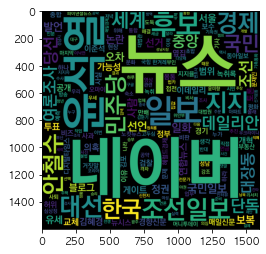

In [38]:
text = str(n['Text'].values)
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

ignore = ['마네','이재명','김홍걸','정치','출처','대통령','진짜'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [32]:
u = df3[df3['Text'].str.contains('우크라이나')]
u[:30]

,Datetime,Tweet Id,Text,Username
6949,2022-02-14 16:36:14+00:00,1.493263e+18,대통령과 각료들은 밤낮을 가리지않고 우크라이나 러시아 전쟁 일보직전에서 안보 물가 ...,Planet0259
7740,2022-02-15 18:21:58+00:00,1.493652e+18,마지막 세상을 바꿀수 있는 신의 한수는 참 위험한 모험 우크라이나 혹은 푸틴과 접촉...,myplus7
8083,2022-02-16 23:41:14+00:00,1.494095e+18,현대는 전쟁으로 얻을 수 있는 건 아무것도 없습니다 평화가 곧 경제 입니다 한반도에...,KKK35123
9267,2022-02-17 23:04:47+00:00,1.494448e+18,이재명 민주당아 소련이 왜 망했니 일을 안해도 돈을 주니 직장 결근율 30 이고 출...,SKYSON01
10326,2022-02-18 22:56:33+00:00,1.494808e+18,우크라이나 사태 보면 윤석열 안된다 국가 운영 은 추진력 과 결단이필요 윤석열은 아...,ANNGWANGOK
11335,2022-02-19 22:41:33+00:00,1.495167e+18,시사타파 심층분석 1 스스로 자멸하는 윤석열 천재 이재명의 돌파력 2 우크라이나 사...,muhyang
11772,2022-02-19 18:19:42+00:00,1.495101e+18,시사타파 심층분석 1 스스로 자멸하는 윤석열 천재 이재명의 돌파력 2 우크라이나 사...,andibas
13705,2022-02-21 21:36:19+00:00,1.495875e+18,우크라이나 위기상황에 코메디언출신 대통령이 해외로 가버리고 상류층도 다 도피했네 윤...,chs10573
14209,2022-02-22 23:34:43+00:00,1.496267e+18,이재명 못막으면 시리아나 우크라이나처럼 아무나 흔들수 있는 나라 로 전락해버릴겁니다...,JerryBaek2
14644,2022-02-22 22:03:05+00:00,1.496244e+18,우크라이나 사태의 전쟁발화설로 증시가 폭락했다 우리나라도 아닌 저 멀리의 나라에서 ...,mrF9Ord9skkc2AL


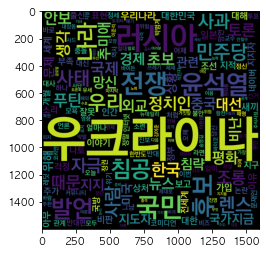

In [39]:
text = str(u['Text'].values)
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

ignore = ['마네','이재명','김홍걸','정치','출처','대통령','진짜'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [33]:
an = df3[df3['Text'].str.contains('안철수')]
an[:30]

,Datetime,Tweet Id,Text,Username
14,2022-02-08 23:57:10+00:00,1.491199e+18,2 9 하루백번복붙 내표내맘 이낙연 지지해도 이재명 안찍는다 윤석열이 최선 윤석열 ...,TheMoonDragon
24,2022-02-08 23:54:03+00:00,1.491199e+18,그지지율 갖고 당선되겠다구 어이없다 국민 우롱하는 거짓말 하는 것을 보니 점점 이재...,simba4688
68,2022-02-08 23:46:45+00:00,1.491197e+18,2 9 하루백번복붙 내표내꺼 내표내맘 이낙연 지지해도 이재명 안찍는다 윤석열이 최선...,AnnaJusticePark
70,2022-02-08 23:45:43+00:00,1.491197e+18,이재명이 급하긴 한가 봄 ㅋㅋㅋ 그래봤자 안찍는다 이재명 절대 안찍어 이낙연 지지해...,AnnaJusticePark
136,2022-02-08 23:35:18+00:00,1.491194e+18,막산이의 메이크업 오늘 아침 안민석이가 CBS 김현정 뉴스쇼에 나와서 이른바 중도 ...,khi0019
174,2022-02-08 23:25:27+00:00,1.491191e+18,이재명 불법 어선 강력히 단속 영해 침범은 격침해야 주적 발언에 전근대적 사고 부인...,koreaTIOT
198,2022-02-08 23:21:12+00:00,1.491190e+18,문파는 장미대선때 너희 찢빠들이 안철수 찍는다고 개소리 지껄일 때도 설득하고 다녔다...,zihana1
209,2022-02-08 23:17:52+00:00,1.491190e+18,옳습니다 우리는 우리의 길을 가면 됩니다 그나저나 찢이 엄청 궁하긴 한가 봅니다 나...,AnnaJusticePark
266,2022-02-08 23:06:58+00:00,1.491187e+18,안철수는 윤석열과 단일화가 정말 그렇게 싫다면 후보 사퇴하라 안철수가 혼자 완주해서...,2ruely
318,2022-02-08 22:49:14+00:00,1.491182e+18,부각 시켜 안철수 찍으면 사표가 될것인가 하는 심리적 갈등을 유발 시키는 효과를 노...,SooKing8090


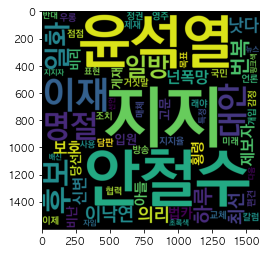

In [40]:
text = str(an['Text'].values)
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

ignore = ['마네','이재명','김홍걸','정치','출처','대통령','진짜'] #제거할 불필요한 단어 및 표현 리스트
 
for word in ignore:
    if word in c:
        del c[word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거
        
wc = WordCloud(font_path='/Users/sonak_bee/Downloads/KOPUBWORLD_TTF_FONTS-1/KoPubWorld Dotum Bold.ttf', width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)